In [1]:
import os
os.listdir()


['.config', 'Nifty 50 Historical Data.csv', 'sample_data']

In [2]:
import pandas as pd

df = pd.read_csv("Nifty 50 Historical Data.csv")
df.head()


,Date,Price,Open,High,Low,Vol.,Change %
0,01/16/2026,"25,694.35","25,696.05","25,873.50","25,662.40",434.04M,0.11%
1,01/14/2026,"25,665.60","25,648.55","25,791.75","25,603.95",393.13M,-0.26%
2,01/13/2026,"25,732.30","25,897.35","25,899.80","25,603.30",339.54M,-0.22%
3,01/12/2026,"25,790.25","25,669.05","25,813.15","25,473.40",275.76M,0.42%
4,01/09/2026,"25,683.30","25,840.40","25,940.60","25,623.00",348.76M,-0.75%


In [3]:
df.columns


Index(['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'], dtype='object')

In [4]:
df.columns = (
    df.columns
      .str.lower()
      .str.replace('.', '', regex=False)
      .str.replace(' ', '_')
)

df.columns


Index(['date', 'price', 'open', 'high', 'low', 'vol', 'change_%'], dtype='object')

In [5]:
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%Y')
df[['date']].head()


,date
0,2026-01-16
1,2026-01-14
2,2026-01-13
3,2026-01-12
4,2026-01-09


In [6]:
price_cols = ['price', 'open', 'high', 'low']

for col in price_cols:
    df[col] = df[col].str.replace(',', '').astype(float)

df[price_cols].head()


,price,open,high,low
0,25694.35,25696.05,25873.50,25662.40
1,25665.60,25648.55,25791.75,25603.95
2,25732.30,25897.35,25899.80,25603.30
3,25790.25,25669.05,25813.15,25473.40
4,25683.30,25840.40,25940.60,25623.00


In [7]:
df['vol'] = (
    df['vol']
      .str.replace('M', '')
      .astype(float)
)

df[['vol']].head()


ValueError: could not convert string to float: '1.01B'

In [8]:
import numpy as np

def parse_volume(x):
    if isinstance(x, str):
        if 'M' in x:
            return float(x.replace('M', ''))
        elif 'B' in x:
            return float(x.replace('B', '')) * 1000
    return np.nan

df['vol'] = df['vol'].apply(parse_volume)

df[['vol']].head()



,vol
0,434.04
1,393.13
2,339.54
3,275.76
4,348.76


In [9]:
df['vol'].describe()


,vol
count,2721.000000
mean,327.393447
std,184.018389
min,2.830000
25%,207.390000
50%,270.470000
75%,383.830000
max,1810.000000


In [10]:
df = df.rename(columns={
    'Date': 'date',
    'Price': 'close',
    'Open': 'open',
    'High': 'high',
    'Low': 'low',
    'Vol.': 'vol',
    'Change %': 'pct_change'
})

df.columns


Index(['date', 'price', 'open', 'high', 'low', 'vol', 'change_%'], dtype='object')

In [11]:
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%Y')
df = df.sort_values('date').reset_index(drop=True)

df.head(), df.tail()


(        date   price     open     high     low     vol change_%
 0 2015-01-19  8550.7  8550.05  8570.95  8531.5  129.35    0.43%
 1 2015-01-20  8695.6  8575.10  8707.90  8574.5  158.71    1.69%
 2 2015-01-21  8729.5  8719.65  8741.85  8689.6  191.65    0.39%
 3 2015-01-22  8761.4  8745.85  8774.15  8727.0  180.91    0.37%
 4 2015-01-23  8835.6  8827.95  8866.40  8795.4  197.12    0.85%,
            date     price      open      high       low     vol change_%
 2720 2026-01-09  25683.30  25840.40  25940.60  25623.00  348.76   -0.75%
 2721 2026-01-12  25790.25  25669.05  25813.15  25473.40  275.76    0.42%
 2722 2026-01-13  25732.30  25897.35  25899.80  25603.30  339.54   -0.22%
 2723 2026-01-14  25665.60  25648.55  25791.75  25603.95  393.13   -0.26%
 2724 2026-01-16  25694.35  25696.05  25873.50  25662.40  434.04    0.11%)

In [12]:
df['pct_change'] = (
    df['pct_change']
    .str.replace('%', '', regex=False)
    .astype(float)
)

df['pct_change'].describe()


KeyError: 'pct_change'

In [13]:
df = df.rename(columns={
    'Date': 'date',
    'Price': 'close',
    'Open': 'open',
    'High': 'high',
    'Low': 'low',
    'Vol.': 'vol',
    'Change %': 'pct_change'
})

df.columns


Index(['date', 'price', 'open', 'high', 'low', 'vol', 'change_%'], dtype='object')

In [14]:
df['pct_change'] = (
    df['pct_change']
    .str.replace('%', '', regex=False)
    .astype(float)
)

df['pct_change'].describe()


KeyError: 'pct_change'

In [15]:
df.columns



Index(['date', 'price', 'open', 'high', 'low', 'vol', 'change_%'], dtype='object')

In [16]:
df = df.rename(columns={
    'price': 'close',
    'change_%': 'pct_change'
})

df.columns


Index(['date', 'close', 'open', 'high', 'low', 'vol', 'pct_change'], dtype='object')

In [17]:
df['pct_change'] = (
    df['pct_change']
    .str.replace('%', '', regex=False)
    .astype(float)
)

df['pct_change'].describe()


,pct_change
count,2725.000000
mean,0.045791
std,1.017381
min,-12.980000
25%,-0.420000
50%,0.060000
75%,0.580000
max,8.760000


In [18]:
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date').reset_index(drop=True)

df.head()
df.tail()


,date,close,open,high,low,vol,pct_change
2720,2026-01-09,25683.30,25840.40,25940.60,25623.00,348.76,-0.75
2721,2026-01-12,25790.25,25669.05,25813.15,25473.40,275.76,0.42
2722,2026-01-13,25732.30,25897.35,25899.80,25603.30,339.54,-0.22
2723,2026-01-14,25665.60,25648.55,25791.75,25603.95,393.13,-0.26
2724,2026-01-16,25694.35,25696.05,25873.50,25662.40,434.04,0.11


In [19]:
df['return'] = df['close'].pct_change()
df[['date', 'close', 'return']].head()


,date,close,return
0,2015-01-19,8550.7,NaN
1,2015-01-20,8695.6,0.016946
2,2015-01-21,8729.5,0.003899
3,2015-01-22,8761.4,0.003654
4,2015-01-23,8835.6,0.008469


In [20]:
import numpy as np

df['log_return'] = np.log(df['close'] / df['close'].shift(1))
df[['date', 'close', 'log_return']].head()


,date,close,log_return
0,2015-01-19,8550.7,NaN
1,2015-01-20,8695.6,0.016804
2,2015-01-21,8729.5,0.003891
3,2015-01-22,8761.4,0.003648
4,2015-01-23,8835.6,0.008433


In [21]:
df[['return', 'log_return']].describe()


,return,log_return
count,2724.000000,2724.000000
mean,0.000456,0.000404
std,0.010175,0.010236
min,-0.129805,-0.139038
25%,-0.004219,-0.004228
50%,0.000614,0.000613
75%,0.005820,0.005803
max,0.087632,0.084003


In [22]:
df['volatility_20d'] = df['log_return'].rolling(20).std() * np.sqrt(252)

df[['date', 'volatility_20d']].tail()


,date,volatility_20d
2720,2026-01-09,0.079919
2721,2026-01-12,0.078512
2722,2026-01-13,0.078757
2723,2026-01-14,0.076088
2724,2026-01-16,0.076119


In [23]:
df.to_csv("nifty50_clean_daily.csv", index=False)


In [24]:
df.to_csv("nifty50_clean_daily.csv", index=False)


In [25]:
df['signal'] = 0
df.loc[df['sma_20'] > df['sma_50'], 'signal'] = 1

df[['date', 'sma_20', 'sma_50', 'signal']].tail()


KeyError: 'sma_20'

In [26]:
df.columns


Index(['date', 'close', 'open', 'high', 'low', 'vol', 'pct_change', 'return',
       'log_return', 'volatility_20d', 'signal'],
      dtype='object')

In [27]:
df['sma_20'] = df['close'].rolling(window=20).mean()
df['sma_50'] = df['close'].rolling(window=50).mean()


In [28]:
df[['date', 'close', 'sma_20', 'sma_50']].tail()


,date,close,sma_20,sma_50
2720,2026-01-09,25683.30,26034.2175,25963.141
2721,2026-01-12,25790.25,26021.3825,25961.389
2722,2026-01-13,25732.30,26006.6325,25961.593
2723,2026-01-14,25665.60,25996.9075,25959.638
2724,2026-01-16,25694.35,25990.6975,25961.572


In [29]:
df['signal'] = 0
df.loc[df['sma_20'] > df['sma_50'], 'signal'] = 1

df[['date', 'sma_20', 'sma_50', 'signal']].tail()


,date,sma_20,sma_50,signal
2720,2026-01-09,26034.2175,25963.141,1
2721,2026-01-12,26021.3825,25961.389,1
2722,2026-01-13,26006.6325,25961.593,1
2723,2026-01-14,25996.9075,25959.638,1
2724,2026-01-16,25990.6975,25961.572,1


In [30]:
df['position'] = df['signal'].shift(1)


In [31]:
df[['date','signal','position']].tail()


,date,signal,position
2720,2026-01-09,1,1.0
2721,2026-01-12,1,1.0
2722,2026-01-13,1,1.0
2723,2026-01-14,1,1.0
2724,2026-01-16,1,1.0


In [32]:
df['daily_return'] = df['close'].pct_change()


In [33]:
df[['date','close','daily_return']].tail()


,date,close,daily_return
2720,2026-01-09,25683.30,-0.007480
2721,2026-01-12,25790.25,0.004164
2722,2026-01-13,25732.30,-0.002247
2723,2026-01-14,25665.60,-0.002592
2724,2026-01-16,25694.35,0.001120


In [34]:
df['strategy_return'] = df['position'] * df['daily_return']


In [35]:
df[['date','position','daily_return','strategy_return']].tail()


,date,position,daily_return,strategy_return
2720,2026-01-09,1.0,-0.007480,-0.007480
2721,2026-01-12,1.0,0.004164,0.004164
2722,2026-01-13,1.0,-0.002247,-0.002247
2723,2026-01-14,1.0,-0.002592,-0.002592
2724,2026-01-16,1.0,0.001120,0.001120


In [36]:
df['cum_market_return'] = (1 + df['daily_return']).cumprod()
df['cum_strategy_return'] = (1 + df['strategy_return']).cumprod()


In [37]:
df['cum_market_return'] = (1 + df['daily_return']).cumprod()
df['cum_strategy_return'] = (1 + df['strategy_return']).cumprod()


In [38]:
df[['date','cum_market_return','cum_strategy_return']].tail()


,date,cum_market_return,cum_strategy_return
2720,2026-01-09,3.003649,3.043371
2721,2026-01-12,3.016157,3.056044
2722,2026-01-13,3.009379,3.049177
2723,2026-01-14,3.001579,3.041273
2724,2026-01-16,3.004941,3.044680


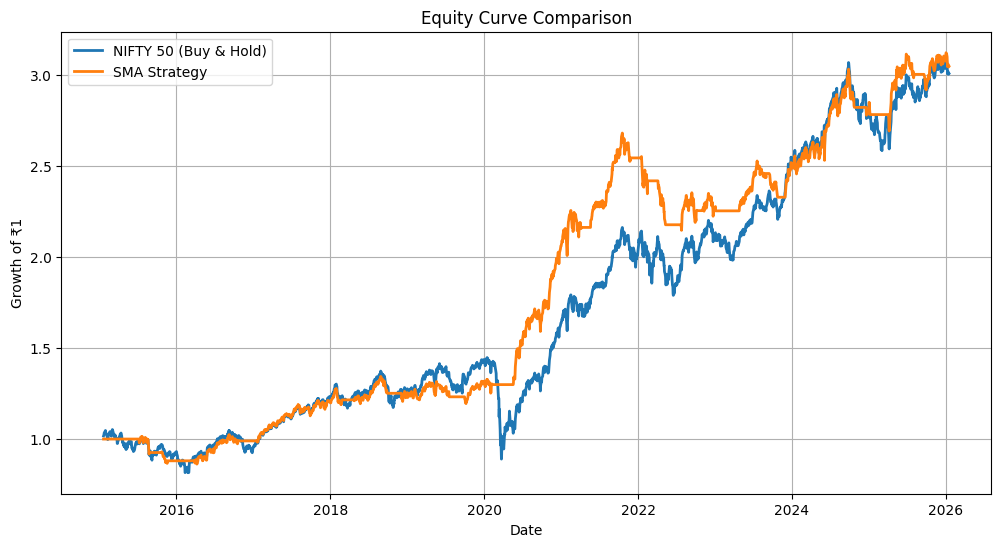

In [39]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(df['date'], df['cum_market_return'], label='NIFTY 50 (Buy & Hold)', linewidth=2)
plt.plot(df['date'], df['cum_strategy_return'], label='SMA Strategy', linewidth=2)

plt.title('Equity Curve Comparison')
plt.xlabel('Date')
plt.ylabel('Growth of ₹1')
plt.legend()
plt.grid(True)
plt.show()


In [40]:
years = (df['date'].iloc[-1] - df['date'].iloc[0]).days / 365

cagr_market = df['cum_market_return'].iloc[-1]**(1/years) - 1
cagr_strategy = df['cum_strategy_return'].iloc[-1]**(1/years) - 1

cagr_market, cagr_strategy


(np.float64(0.10519683689129145), np.float64(0.10651761260624859))

In [41]:
vol_market = df['daily_return'].std() * (252**0.5)
vol_strategy = df['strategy_return'].std() * (252**0.5)

vol_market, vol_strategy


(0.16151972824514285, 0.10760297108126793)

In [42]:
sharpe_market = (df['daily_return'].mean() * 252) / vol_market
sharpe_strategy = (df['strategy_return'].mean() * 252) / vol_strategy

sharpe_market, sharpe_strategy



(np.float64(0.7116720332029932), np.float64(1.0112872687537535))

In [43]:
df['market_peak'] = df['cum_market_return'].cummax()
df['strategy_peak'] = df['cum_strategy_return'].cummax()

df['market_dd'] = (df['cum_market_return'] / df['market_peak']) - 1
df['strategy_dd'] = (df['cum_strategy_return'] / df['strategy_peak']) - 1

max_dd_market = df['market_dd'].min()
max_dd_strategy = df['strategy_dd'].min()

max_dd_market, max_dd_strategy


(-0.38439853425333415, -0.19926179326031745)

In [44]:
transaction_cost = 0.0005

df['trade'] = df['signal'].diff().abs()
df['strategy_return_tc'] = df['strategy_return'] - df['trade'] * transaction_cost

df['cum_strategy_return_tc'] = (1 + df['strategy_return_tc']).cumprod()

df[['date', 'cum_strategy_return', 'cum_strategy_return_tc']].tail()


,date,cum_strategy_return,cum_strategy_return_tc
2720,2026-01-09,3.043371,2.972660
2721,2026-01-12,3.056044,2.985038
2722,2026-01-13,3.049177,2.978331
2723,2026-01-14,3.041273,2.970611
2724,2026-01-16,3.044680,2.973939


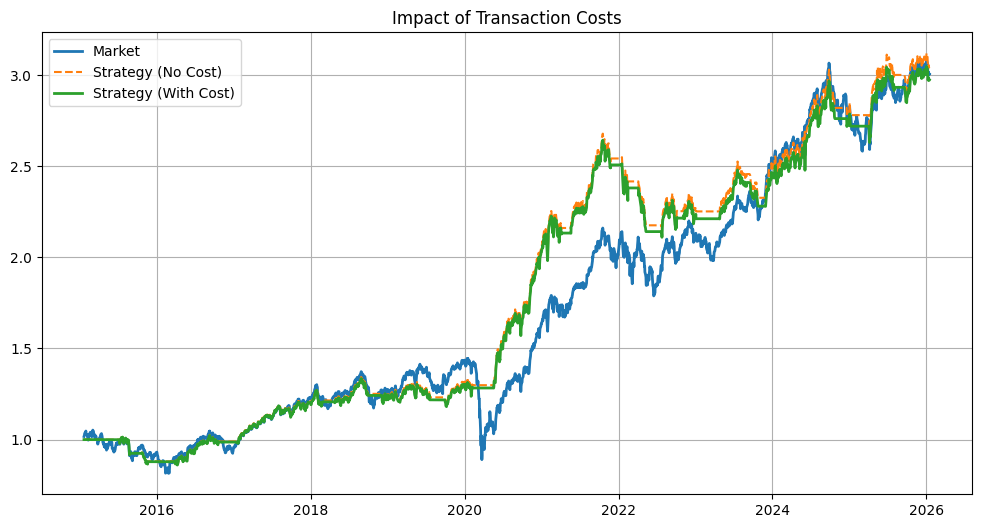

In [45]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(df['date'], df['cum_market_return'], label='Market', linewidth=2)
plt.plot(df['date'], df['cum_strategy_return'], label='Strategy (No Cost)', linestyle='--')
plt.plot(df['date'], df['cum_strategy_return_tc'], label='Strategy (With Cost)', linewidth=2)

plt.title('Impact of Transaction Costs')
plt.legend()
plt.grid(True)
plt.show()


In [46]:
df['sma_200'] = df['close'].rolling(200).mean()

df['signal_filtered'] = 0
df.loc[
    (df['sma_20'] > df['sma_50']) & (df['close'] > df['sma_200']),
    'signal_filtered'
] = 1

df['strategy_return_filtered'] = df['daily_return'] * df['signal_filtered'].shift(1)

df['cum_strategy_filtered'] = (1 + df['strategy_return_filtered']).cumprod()

df[['date', 'cum_strategy_return_tc', 'cum_strategy_filtered']].tail()


,date,cum_strategy_return_tc,cum_strategy_filtered
2720,2026-01-09,2.972660,2.107335
2721,2026-01-12,2.985038,2.116110
2722,2026-01-13,2.978331,2.111355
2723,2026-01-14,2.970611,2.105882
2724,2026-01-16,2.973939,2.108241


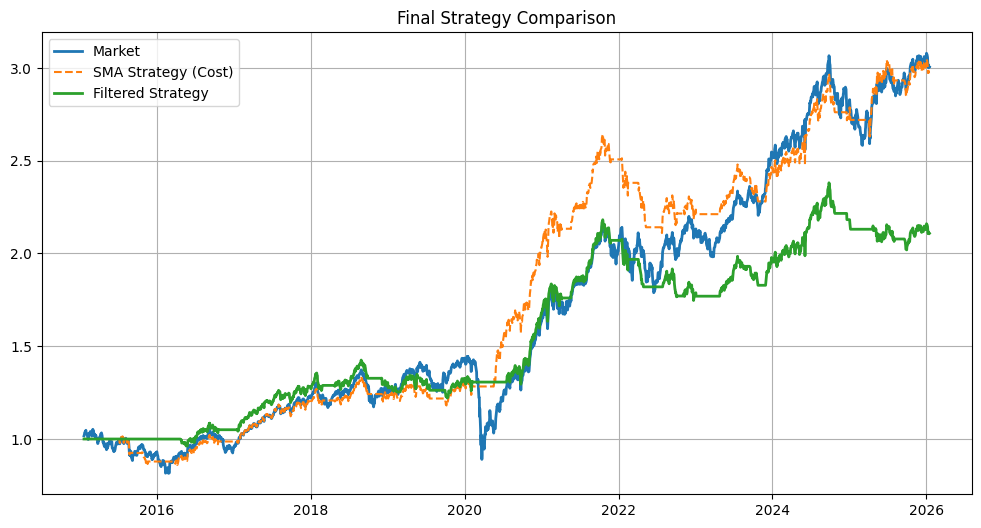

In [47]:
plt.figure(figsize=(12,6))
plt.plot(df['date'], df['cum_market_return'], label='Market', linewidth=2)
plt.plot(df['date'], df['cum_strategy_return_tc'], label='SMA Strategy (Cost)', linestyle='--')
plt.plot(df['date'], df['cum_strategy_filtered'], label='Filtered Strategy', linewidth=2)

plt.title('Final Strategy Comparison')
plt.legend()
plt.grid(True)
plt.show()


In [48]:
import numpy as np

years = (df['date'].iloc[-1] - df['date'].iloc[0]).days / 365

cagr_market = df['cum_market_return'].iloc[-1] ** (1/years) - 1
cagr_strategy = df['cum_strategy_filtered'].iloc[-1] ** (1/years) - 1

cagr_market, cagr_strategy


(np.float64(0.10519683689129145), np.float64(0.07015651363167952))

In [49]:
vol_market = df['daily_return'].std() * np.sqrt(252)
vol_strategy = df['strategy_return_filtered'].std() * np.sqrt(252)

vol_market, vol_strategy


(np.float64(0.16151972824514285), np.float64(0.09520181604277232))

In [50]:
sharpe_market = cagr_market / vol_market
sharpe_strategy = cagr_strategy / vol_strategy

sharpe_market, sharpe_strategy


(np.float64(0.6512940433606437), np.float64(0.7369241107770419))

In [51]:
def max_drawdown(series):
    roll_max = series.cummax()
    drawdown = series / roll_max - 1
    return drawdown.min()

mdd_market = max_drawdown(df['cum_market_return'])
mdd_strategy = max_drawdown(df['cum_strategy_filtered'])

mdd_market, mdd_strategy


(-0.38439853425333415, -0.1994675209017146)

In [52]:
win_rate = (df['strategy_return_filtered'] > 0).mean()
win_rate


np.float64(0.32623853211009174)

In [53]:
summary = pd.DataFrame({
    'Metric': ['CAGR', 'Volatility', 'Sharpe', 'Max Drawdown', 'Win Rate'],
    'Market': [cagr_market, vol_market, sharpe_market, mdd_market, np.nan],
    'Strategy': [cagr_strategy, vol_strategy, sharpe_strategy, mdd_strategy, win_rate]
})

summary


,Metric,Market,Strategy
0,CAGR,0.105197,0.070157
1,Volatility,0.161520,0.095202
2,Sharpe,0.651294,0.736924
3,Max Drawdown,-0.384399,-0.199468
4,Win Rate,NaN,0.326239


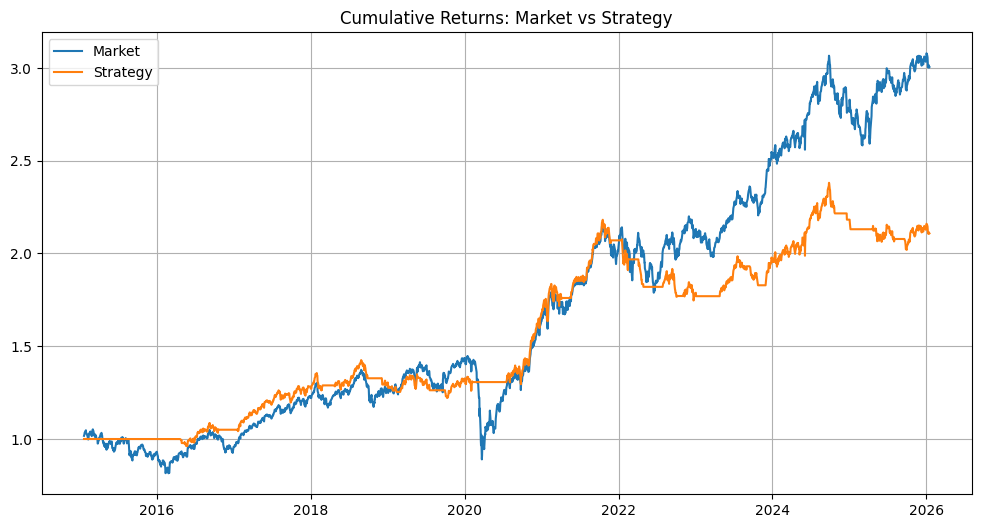

In [54]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(df['date'], df['cum_market_return'], label='Market')
plt.plot(df['date'], df['cum_strategy_filtered'], label='Strategy')
plt.legend()
plt.title('Cumulative Returns: Market vs Strategy')
plt.grid(True)
plt.show()


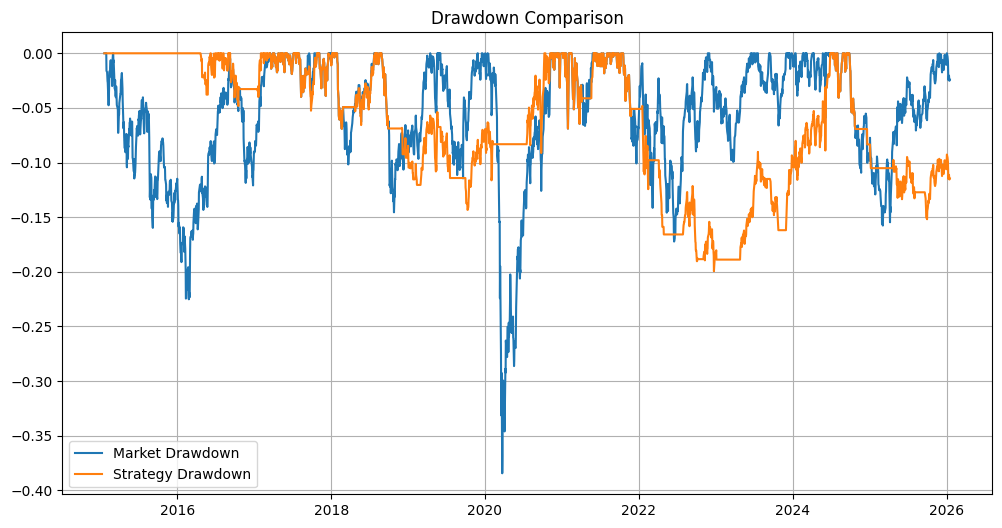

In [55]:
def drawdown(series):
    return series / series.cummax() - 1

df['dd_market'] = drawdown(df['cum_market_return'])
df['dd_strategy'] = drawdown(df['cum_strategy_filtered'])

plt.figure(figsize=(12,6))
plt.plot(df['date'], df['dd_market'], label='Market Drawdown')
plt.plot(df['date'], df['dd_strategy'], label='Strategy Drawdown')
plt.legend()
plt.title('Drawdown Comparison')
plt.grid(True)
plt.show()


In [56]:
transaction_cost = 0.001  # 0.1%

df['strategy_return_tc'] = df['strategy_return']

# cost applied when signal changes (trade happens)
df.loc[df['signal'].diff().abs() == 1, 'strategy_return_tc'] -= transaction_cost


In [57]:
df['cum_strategy_tc'] = (1 + df['strategy_return_tc']).cumprod()

df[['date', 'cum_strategy_filtered', 'cum_strategy_tc']].tail()


,date,cum_strategy_filtered,cum_strategy_tc
2720,2026-01-09,2.107335,2.903558
2721,2026-01-12,2.116110,2.915649
2722,2026-01-13,2.111355,2.909097
2723,2026-01-14,2.105882,2.901557
2724,2026-01-16,2.108241,2.904807


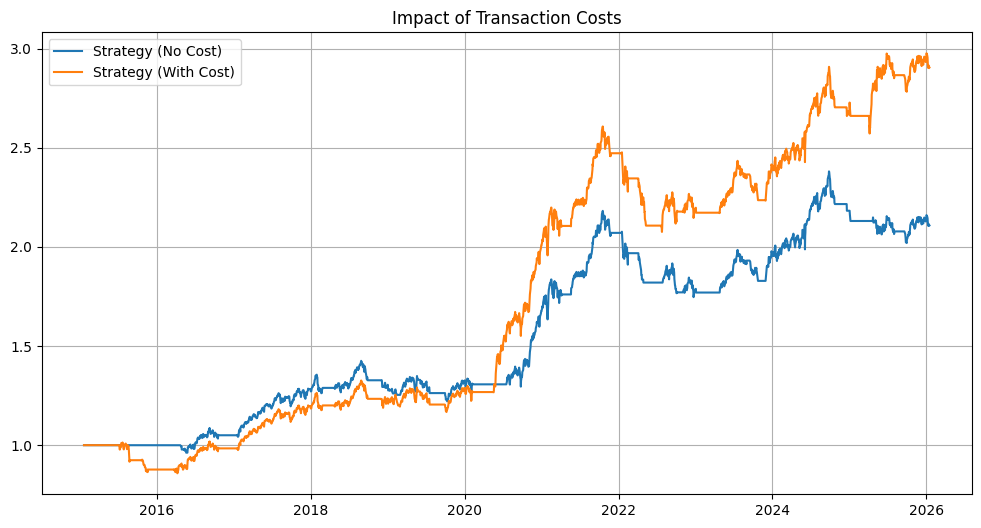

In [58]:
plt.figure(figsize=(12,6))
plt.plot(df['date'], df['cum_strategy_filtered'], label='Strategy (No Cost)')
plt.plot(df['date'], df['cum_strategy_tc'], label='Strategy (With Cost)')
plt.legend()
plt.title('Impact of Transaction Costs')
plt.grid(True)
plt.show()


In [59]:
strategy_cagr_tc = df['cum_strategy_tc'].iloc[-1] ** (252/len(df)) - 1
strategy_vol_tc = df['strategy_return_tc'].std() * (252 ** 0.5)
strategy_sharpe_tc = strategy_cagr_tc / strategy_vol_tc

strategy_dd_tc = drawdown(df['cum_strategy_tc']).min()

strategy_cagr_tc, strategy_vol_tc, strategy_sharpe_tc, strategy_dd_tc


(np.float64(0.10364074419508129),
 0.10764311325933397,
 np.float64(0.9628181595360387),
 -0.20402891517622368)

In [60]:
split = int(len(df) * 0.7)

train = df.iloc[:split].copy()
test  = df.iloc[split:].copy()

train.shape, test.shape


((1907, 32), (818, 32))

In [61]:
test['strategy_return'] = test['signal'].shift(1) * test['daily_return']
test['strategy_return'].fillna(0, inplace=True)

test['cum_market']  = (1 + test['daily_return']).cumprod()
test['cum_strategy'] = (1 + test['strategy_return']).cumprod()

test[['date', 'cum_market', 'cum_strategy']].tail()


/tmp/ipython-input-4180223185.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test['strategy_return'].fillna(0, inplace=True)


,date,cum_market,cum_strategy
2720,2026-01-09,1.527123,1.368036
2721,2026-01-12,1.533482,1.373732
2722,2026-01-13,1.530036,1.370646
2723,2026-01-14,1.526070,1.367093
2724,2026-01-16,1.527780,1.368624


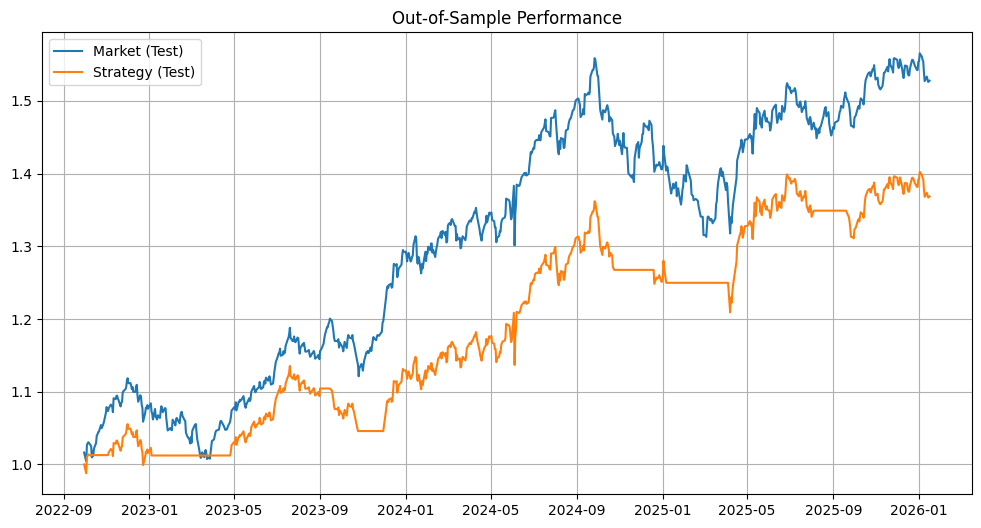

In [62]:
plt.figure(figsize=(12,6))
plt.plot(test['date'], test['cum_market'], label='Market (Test)')
plt.plot(test['date'], test['cum_strategy'], label='Strategy (Test)')
plt.legend()
plt.title('Out-of-Sample Performance')
plt.grid(True)
plt.show()


In [63]:
test_cagr = test['cum_strategy'].iloc[-1] ** (252/len(test)) - 1
test_vol  = test['strategy_return'].std() * (252 ** 0.5)
test_sharpe = test_cagr / test_vol

test_dd = drawdown(test['cum_strategy']).min()

test_cagr, test_vol, test_sharpe, test_dd


(np.float64(0.10150090671294731),
 0.1013872414238215,
 np.float64(1.0011211005204361),
 -0.11210001079840037)